In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
path = 'dataset/'

In [ ]:
final_df = pd.read_csv('{}basic_final_df.csv'.format(path), index_col='Unnamed: 0')
final_df

,회사명,거래소코드,차기부도여부,회계년도,산업코드,소속코드,상장일,감사의견코드,총자본증가율,유형자산증가율,...,PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),산업대분류
0,(주)CMG제약,58820,0,2007.0,32102,5.0,2001/08/31,UQ,120.08,215.25,...,0.00,149.75,20.92,69545.33,-1288.45,-71.74,0.00,-104.44,0.000,3
1,(주)CMG제약,58820,0,2008.0,32102,5.0,2001/08/31,UQ,56.55,55.67,...,0.00,9.13,1.49,-454.50,-3419.79,-31.64,-4.56,-221.19,0.133,3
2,(주)CMG제약,58820,0,2009.0,32102,5.0,2001/08/31,UQ,-33.92,-8.50,...,0.00,8.40,1.72,26517.58,-7100.69,-69.98,-6.80,-443.98,0.000,3
3,(주)CMG제약,58820,0,2010.0,32102,5.0,2001/08/31,UQ,5.66,-11.92,...,0.00,3.22,1.04,31200.74,-5598.06,-49.32,-5.51,-243.34,0.000,3
4,(주)CMG제약,58820,0,2011.0,32102,5.0,2001/08/31,UQ,14.18,7.86,...,0.00,3.14,1.05,37758.74,2038.64,11.48,11.24,46.75,18.522,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18432,흥구석유(주),24060,0,2015.0,74607,5.0,1994/12/07,UQ,12.89,-0.74,...,6.93,0.32,0.20,48071.55,856.25,0.55,15.54,57.08,56.142,7
18433,흥구석유(주),24060,0,2016.0,74607,5.0,1994/12/07,UQ,1.39,-5.61,...,35.62,0.43,0.28,55934.79,1348.52,0.94,10.71,89.90,41.479,7
18434,흥구석유(주),24060,0,2017.0,74607,5.0,1994/12/07,UQ,0.98,-0.56,...,24.31,0.34,0.24,46036.63,1147.56,0.74,9.02,76.50,40.117,7
18435,흥구석유(주),24060,0,2018.0,74607,5.0,1994/12/07,UQ,-5.89,-0.36,...,7.82,0.40,0.24,36557.57,1451.79,0.87,16.83,96.79,25.181,7


In [ ]:
final_df.isnull().sum(1).value_counts()

0    18437
dtype: int64

In [ ]:
a1 = final_df.loc[final_df['산업대분류']==3]
a2 = final_df.loc[final_df['산업대분류']==7]
a3 = final_df.loc[final_df['산업대분류']==10]

In [ ]:
print(a1[a1['차기부도여부']==0]['회사명'].nunique())
print(a2[a2['차기부도여부']==0]['회사명'].nunique())
print(a3[a3['차기부도여부']==0]['회사명'].nunique())

print(len(a1[a1['차기부도여부']==1]))
print(len(a2[a2['차기부도여부']==1]))
print(len(a3[a3['차기부도여부']==1]))

1579
201
292
149
28
37


In [ ]:
FR_list = final_df.columns[8:-1].tolist()
FR_list.append('차기부도여부')

# 정규성 검정 시행 목적 데이터프레임
subset = final_df[FR_list]

# 이분산성 검정 시행 목적 데이터프레임 
bc_df = subset.loc[subset['차기부도여부']==1]
nc_df = subset.loc[subset['차기부도여부']==0]

In [ ]:
print('정상기업 개수 : {}'.format(final_df.loc[final_df['차기부도여부']==0]['회사명'].nunique()))
print('부도기업 개수 : {}'.format(final_df.loc[final_df['차기부도여부']==1]['회사명'].nunique()))

subset

정상기업 개수 : 2072
부도기업 개수 : 214


,총자본증가율,유형자산증가율,유동자산증가율,영업이익증가율,순이익증가율,재고자산증가율,자기자본증가율,매출액증가율,종업원1인당 부가가치증가율,종업원수증가율,...,PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),차기부도여부
0,120.08,215.25,29.79,0.00,0.00,0.00,193.28,-45.98,0.00,1300.00,...,0.00,149.75,20.92,69545.33,-1288.45,-71.74,0.00,-104.44,0.000,0
1,56.55,55.67,86.84,0.00,0.00,445.64,19.57,501.81,0.00,19.64,...,0.00,9.13,1.49,-454.50,-3419.79,-31.64,-4.56,-221.19,0.133,0
2,-33.92,-8.50,-41.24,0.00,0.00,42.07,-61.98,-6.12,0.00,-11.19,...,0.00,8.40,1.72,26517.58,-7100.69,-69.98,-6.80,-443.98,0.000,0
3,5.66,-11.92,18.08,0.00,0.00,18.70,82.10,11.86,0.00,8.40,...,0.00,3.22,1.04,31200.74,-5598.06,-49.32,-5.51,-243.34,0.000,0
4,14.18,7.86,31.54,0.00,0.00,-4.87,6.72,56.40,0.00,4.65,...,0.00,3.14,1.05,37758.74,2038.64,11.48,11.24,46.75,18.522,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18432,12.89,-0.74,-15.96,-60.19,63.95,-23.42,3.11,-19.73,32.13,-8.33,...,6.93,0.32,0.20,48071.55,856.25,0.55,15.54,57.08,56.142,0
18433,1.39,-5.61,7.35,108.43,-25.71,52.46,1.39,-7.26,-7.96,-3.03,...,35.62,0.43,0.28,55934.79,1348.52,0.94,10.71,89.90,41.479,0
18434,0.98,-0.56,7.34,-22.03,-5.19,9.41,0.83,8.12,3.78,-3.13,...,24.31,0.34,0.24,46036.63,1147.56,0.74,9.02,76.50,40.117,0
18435,-5.89,-0.36,-21.19,45.37,14.78,-46.09,0.99,6.87,16.10,-9.68,...,7.82,0.40,0.24,36557.57,1451.79,0.87,16.83,96.79,25.181,0


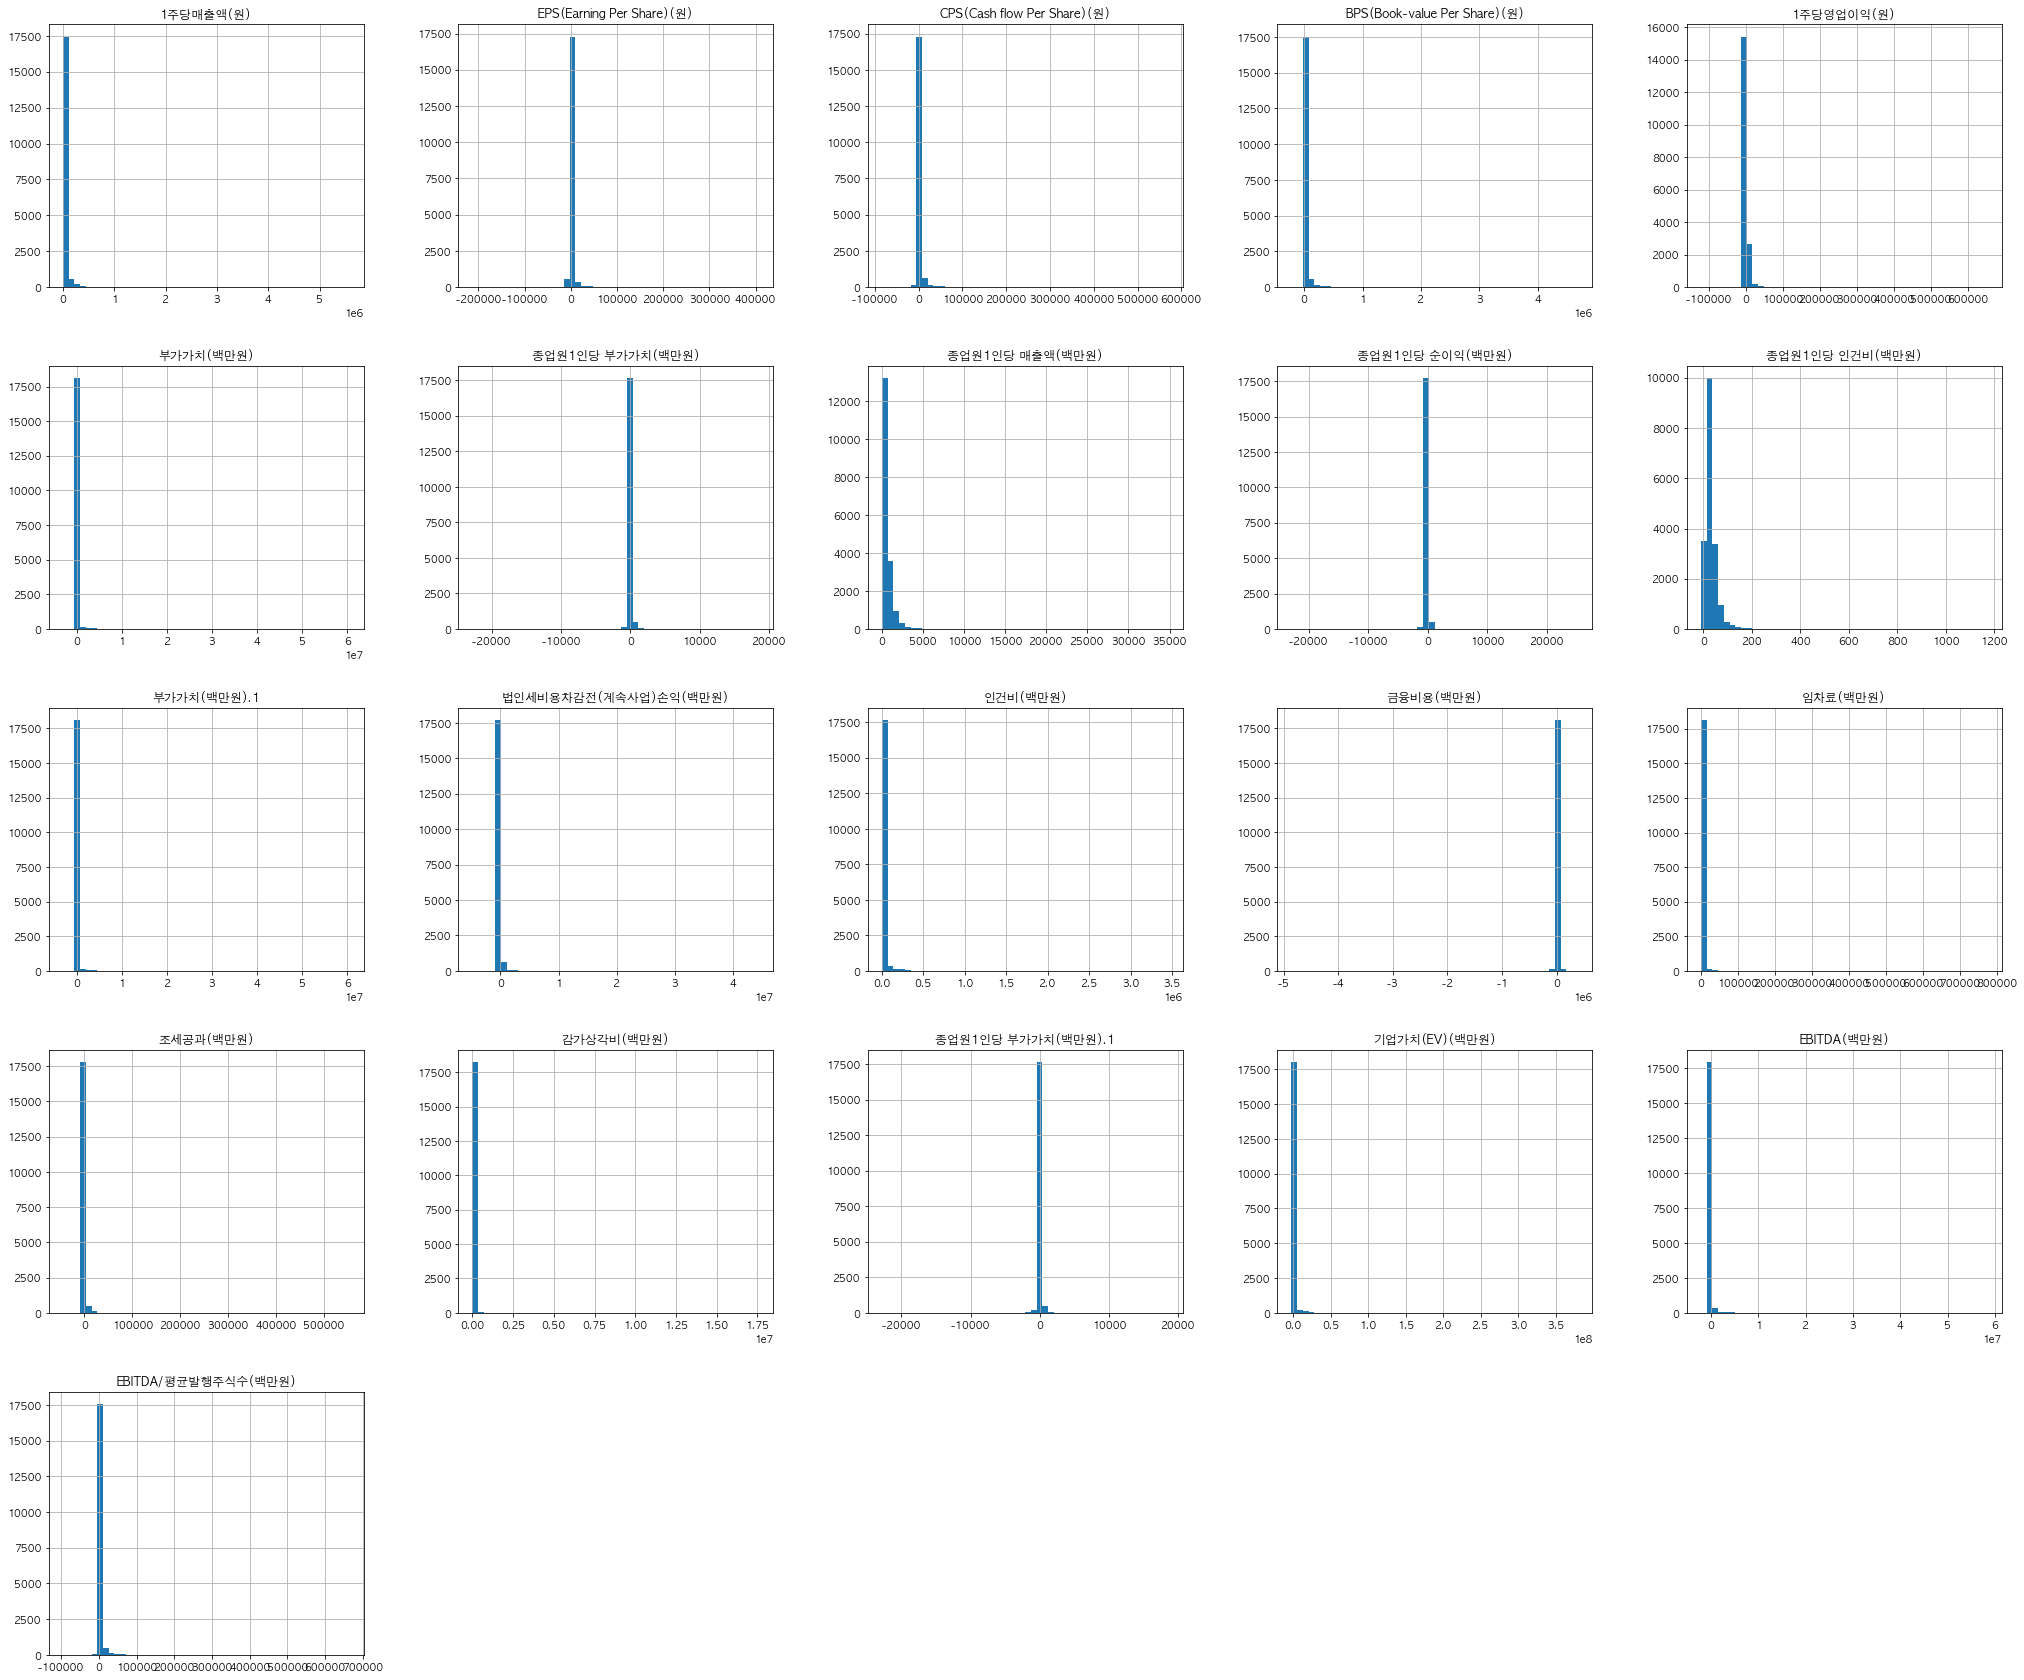

In [ ]:
subset[nRatio].hist(figsize = (35,30), bins = 50)
plt.show()

In [ ]:
# corr 시각화
def corr_heatmap(dataset):
    """[상관관계 그래프]

    Args:
        dataset ([DataFrame]): [데이터프래임을 입력해주세요]
    """
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(np.bool) 
    sns.heatmap(dataset.corr(), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 6}, linewidths=.5, mask=mask_ut)
    plt.figure(figsize=(40,40))
    plt.show()

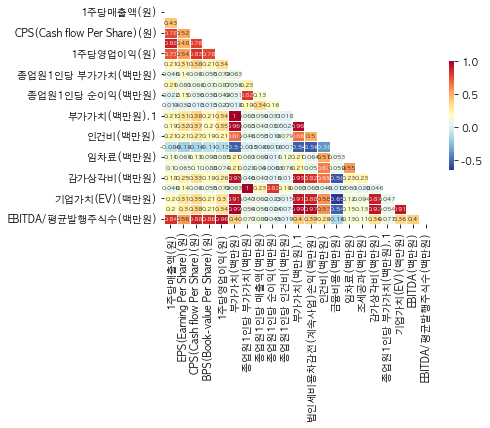

<Figure size 2880x2880 with 0 Axes>

In [ ]:
corr_heatmap(subset[nRatio])


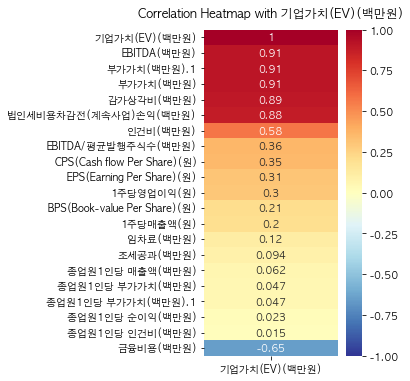

In [ ]:
def col_corr_list(dataset, col_name):
    """[데이터 프레임 내 컬럼의 상관 관계를 보여주는 plot입니다.]

    Args:
        dataset ([DataFrame]): [데이터프레임을 입력해주세요]
        col_name ([column]): [데이터 내의 컬럼 이름을 입력해주세요]
    """
    # credit correlation을 크기별로 정렬하고 인덱스를 뽑습니다.
    y_label = dataset.corr()[[col_name]].sort_values(by=col_name,ascending=False).index.tolist()
    
    fig, ax = plt.subplots(figsize=(3, 6))
    sns.heatmap(dataset.corr()[[col_name]].sort_values(by=col_name,ascending=False), 
                vmin = -1, vmax = 1, annot=True, cmap="RdYlBu_r")
    ax.set_title('Correlation Heatmap with {}'.format(col_name), pad = 12)
    ax.set_yticklabels(y_label, rotation=0)
    plt.show()
    
col_corr_list(subset[nRatio], '기업가치(EV)(백만원)')


In [ ]:
from scipy.stats import skew, describe

In [ ]:
# skew_list = []
# kurtosis_list = []
# nskew_list = []
# nkurtosis_list = []

# for i in subset.columns[:-1]:
#     Sresult = describe(subset[i])[4]
#     Kresult = describe(subset[i])[5]
#     print('{}의 왜도 = {}, 첨도 = {}'.format(i, Sresult, Kresult))
#     if abs(Sresult) < 3:
#         skew_list.append(i)
#     else:
#         nskew_list.append(i)
#     if abs(Kresult) < 8:
#         kurtosis_list.append(i)
#     else:
#         nkurtosis_list.append(i)

# print(len(skew_list), len(kurtosis_list))
# print(len(nskew_list), len(nkurtosis_list))


In [ ]:
# result = list(set(skew_list) | set(kurtosis_list))
# result

In [ ]:
# nresult = list(set(nskew_list) | set(nkurtosis_list))
# nresult

# 4. 훈련,테스트셋 분리 및 변수 유의성 검정 시행

## 4-1 변수 유의성 검정을 위한 정규분포성, 이분산성 검정 (5.)

In [ ]:
# train, test 분리
test = final_df[final_df['회계년도'] >= 2018]
train = final_df[final_df['회계년도'] < 2018]

# trainset 내에서 부도, 정상기업 분리
bc_df = train.loc[train['차기부도여부']==1]
nc_df = train.loc[train['차기부도여부']==0]

# 모델 형성을 위한 feature, target 분리
X_train = train[FR_list[:-1]]
y_train = train[FR_list[-1]]
X_test = test[FR_list[:-1]]
y_test = test[FR_list[-1]]

In [ ]:
# subset[result].hist(figsize = (35,30), bins = 50)
# plt.show()

In [ ]:
# subset[nresult].hist(figsize = (35,30), bins = 50)
# plt.show()

In [ ]:
# from scipy.stats import anderson, shapiro, kstest, normaltest, jarque_bera, skew, yeojohnson_normmax, yeojohnson_normplot, yeojohnson
# shapiro
# 하지만, data의 개수가 5000개를 초과하기 떄문에, P값이 정확하지 않을 수 있다고 함
# 따라서 다른 정규성 검정을 시행해야 함

# anderson-test 시행
# 검정통계치와 _Avals_norm : array([0.576, 0.656, 0.787, 0.918, 1.092])를 비교하여 정규성을 검정한다.
# _Avals_norm의 유의수준은 %값으로 다음 열과 매칭된다. array([15. , 10. ,  5. ,  2.5,  1. ])
# 따라서 검정통계치와 유의수준 0.05에서 임계치인 0.787을 비교하여 통계치가 더 크면 P값이 매우 유의미하므로 정규분포를 따른다는 귀무가설을 기각할 수 있다

# normaltest

# jarque_bera 검정 (sample 수가 2000개를 넘을 경우, 적절한 정규성 검정임)


In [ ]:
# nm_dist = []
# nnm_dist = []
# for i in subset.columns[:-1]:
#     Sresult = np.round(shapiro(subset[i]).pvalue,3)
#     if Sresult < 0.05:
#         nm_dist.append(i)
#     else:
#         nnm_dist.append(i)

# print(len(nm_dist), len(nnm_dist))

In [ ]:
# nm_dist = []
# nnm_dist = []
# for i in subset.columns[:-1]:
#     Aresult = anderson(subset[i])[1][2]
#     if Aresult < 0.787:
#         nm_dist.append(i)
#     else:
#         nnm_dist.append(i)

# print(len(nm_dist), len(nnm_dist))

In [ ]:
# nm_dist = []
# nnm_dist = []
# for i in subset.columns[:-1]:
#     Kresult = np.round(kstest(subset[i], 'norm').pvalue,3) # 정규분포와 동일하다는 귀무가설 설정
#     if Kresult < 0.05: # 정규분포와 동일하다는 귀무가설을 기각할 수 있다
#         nnm_dist.append(i)
#     else:
#         nm_dist.append(i)

# print(len(nm_dist), len(nnm_dist))

In [ ]:
# nm_dist = []
# nnm_dist = []
# for i in subset.columns[:-1]:
#     Nresult = np.round(normaltest(subset[i])[1],3)
#     if Nresult < 0.05:  # 정규분포를 따른다는 귀무가설을 기각
#         nnm_dist.append(i)
#     else:
#         nm_dist.append(i)

# print(len(nm_dist), len(nnm_dist))


In [ ]:
# # jarque_bera 검정 (sample 수가 2000개를 넘을 경우, 적절한 정규성 검정임)
# nm_dist = []
# nnm_dist = []
# for i in subset.columns[:-1]:
#     Nresult = np.round(jarque_bera(subset[i])[1],3)
#     if Nresult < 0.05:  # 정규분포를 따른다는 귀무가설을 기각
#         nnm_dist.append(i)
#     else:
#         nm_dist.append(i)

# print(len(nm_dist), len(nnm_dist))

### 정규성 검정 결과
- 데이터가 2000개를 넘으면 성과를 보장할 수 없는 shaprio를 제외한 나머지는 157개 feature에 대해 모두 비정규성을 보유한다는 결과로 도출됨

In [ ]:
from scipy.stats import bartlett

# 정규성이 보장된 경우 시행하는 등분산성 검정으로 3개 이상의 모집단 등분산성에도 검정이 가능함.

from scipy.stats import levene

# P값이 작다면, 등분산성 가정을 유의미하게 충족하지 못한다. (이분산성을 갖는다)
# levene의 default 값이 center = median으로 설정되어 있음. 
# 따라서 정규성이 없는 집단의 등분산성 검정이 bartlett 보다는 더 강건하게 할 수 있다.

from scipy.stats import fligner

# 모집단의 분포에 대한 가정이 없이 비모수에 대한 등분산성 검정에 용이하게 사용된다.

# 위 3개의 통계검정은 'H0 = 등분산성을 충족한다.'이다.

# flinger-test 시행

# eq_var = []
# neq_var = []
# for i in subset.columns[:-1]:
#     ser_1 = nc_df[i]
#     ser_2 = bc_df[i]

#     fresult = np.round(fligner(ser_1, ser_2)[1],3)
#     if fresult < 0.05:
#         eq_var.append(i)
#     else:
#         neq_var.append(i)

# print(len(eq_var), len(neq_var))

In [ ]:
# bartlett-test 시행
eq_var = []
neq_var = []
for i in subset.columns[:-1]:
    ser_1 = nc_df[i]
    ser_2 = bc_df[i]

    lresult = np.round(bartlett(ser_1, ser_2)[1],3)
    if lresult < 0.05:
        eq_var.append(i)
    else:
        neq_var.append(i)

print(len(eq_var), len(neq_var))

145 12


In [ ]:
# levene-test 시행
# center = 'mean', 'median', 'trimmed'(proportioncut = 0.01) 
leq_var1 = []
lneq_var1 = []
leq_var2 = []
lneq_var2 = []
leq_var3 = []
lneq_var3 = []
for i in subset.columns[:-1]:
    ser_1 = nc_df[i]
    ser_2 = bc_df[i]

    lresult1 = np.round(levene(ser_1, ser_2, center='median')[1],3)
    lresult2 = np.round(levene(ser_1, ser_2, center='mean')[1],3)
    lresult3 = np.round(levene(ser_1, ser_2, center='trimmed', proportiontocut = 0.01)[1],3)
    
    if lresult1 < 0.05:
        leq_var1.append(i)
    else:
        lneq_var1.append(i)
    if lresult2 < 0.05:
        leq_var2.append(i)
    else:
        lneq_var2.append(i)
    if lresult3 < 0.05:
        leq_var3.append(i)
    else:
        lneq_var3.append(i)
print(len(leq_var1), len(lneq_var1))
print(len(leq_var2), len(lneq_var2))
print(len(leq_var3), len(lneq_var3))


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/morestats.py:2603: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


64 93
74 83
128 29


In [ ]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import mannwhitneyu, ttest_ind

# sig_diff1 = []
# nsig_diff1 = []
# for i in sig_diff:
#     ser_1 = nc_df[i]
#     ser_2 = bc_df[i]

#     fresult = np.round(ttest_ind(ser_1, ser_2)[1],3)
#     if fresult < 0.01:
#         sig_diff1.append(i)
#     else:
#         nsig_diff1.append(i)

# print(len(sig_diff1), len(nsig_diff1))

In [ ]:
def z_test(eq_var = eq_var):
    sig_diff = []
    nsig_diff = []
    for i in eq_var:
        ser_1 = nc_df[i]
        ser_2 = bc_df[i]

        fresult = np.round(ztest(ser_1, ser_2)[1],3)
        if fresult < 0.01:
            sig_diff.append(i)
        else:
            nsig_diff.append(i)

    print(len(sig_diff), len(nsig_diff))
    return sig_diff,nsig_diff

In [ ]:
def welch_t_test(neq_var=neq_var):
    sig_diff1 = []
    nsig_diff1 = []
    for i in neq_var:
        ser_1 = nc_df[i]
        ser_2 = bc_df[i]

        fresult = np.round(ttest_ind(ser_1, ser_2, equal_var=False)[1],3)
        if fresult < 0.01:
            sig_diff1.append(i)
        else:
            nsig_diff1.append(i)

    print(len(sig_diff1), len(nsig_diff1))
    return sig_diff1, nsig_diff1

In [ ]:
# bartlett-test
sig_diff , nsig_diff  = z_test(eq_var)
sig_diff_ , nsig_diff_  = welch_t_test(neq_var)

sig_val = sig_diff + sig_diff_
len(sig_val)

57 88
6 6


63

In [ ]:
# levene median
sig_diff1, nsig_diff1 = z_test(leq_var1)
sig_diff1_, nsig_diff1_ = welch_t_test(lneq_var1)

sig_val1 = sig_diff1 + sig_diff1_
len(sig_val1)

51 13
42 51


93

In [ ]:
# levene mean
sig_diff2, nsig_diff2 = z_test(leq_var2)
sig_diff2_, nsig_diff2_ = welch_t_test(lneq_var2)

sig_val2 = sig_diff2 + sig_diff2_
len(sig_val2)

53 21
33 50


86

In [ ]:
# levene trimmed
sig_diff3, nsig_diff3 = z_test(leq_var3)
sig_diff3_, nsig_diff3_ = welch_t_test(lneq_var3)

sig_val3 = sig_diff3 + sig_diff3_
len(sig_val3)

53 75
12 17


65

### 4-1 결론
1.	원래 Z-test, T-test로 두 모집단 (부도 유무)의 평균이 유의미하게 다르다라는 것을 검정할 수 있다. 하지만, 모집단이 정규성을 가지고 등분산성을 가지는 경우에만 사용할 수 있기에 우리는 사용할 수 없다.
2.	우리 데이터처럼 비모수, 불균등, 등분산 성을 가지는 경우(129)에는 Mann-Whitney U를 사용할 수 있다. 하지만, 비모수, 불균등, 이분산성을 가지는 경우(29)는 사용할 수 없다는 것이 문제이다. 
3.	결론
- 이분산성을 가지는 경우, 적절한 통계적 기법이 없다. 따라서 여러 개의 방법을 시도해봐야 할 듯 하다.
    - 정규화를 해주는 Scaler 작업을 29개 feature에 실시 후, 29개에 대해 Z 검정 & T 검정 시행 (하지만, 해석상의 어려움이 일부 존재할 것 같다는 생각이 들었음)
        1.	BOX_COS 변환의 경우 사용불가 (음수, 0의 값을 가지는 경우 불가능)
    - 일관적으로 Mann-Whitney U 검정을 실시하는 법
    - 위 두가지 방법이 마땅치 않은 경우는 29개 feature Drop도 작게나마 고려한다.


진짜 최종
  - 중심극한정리에 의해 각 feature는 정규성을 따르게 된다. (sample N > 30)
  - 정규성을 가정하게 된다면, Bartlett-test, levene-test를 시행할 수 있다.
  - 시행해본 결과를 토대로 등분산은 t-test & Z-test / 이분산은 whelch's t-test를 시행함
  - 그 결과 평균이 유의미하게 다른 것은 총 63개로 뽑힘.


## 4-2 단변량 로짓, stepwise 추출법 시행

In [ ]:
# train, test 분리
test = final_df[final_df['회계년도'] >= 2018]
train = final_df[final_df['회계년도'] < 2018]

X_train = train[FR_list[:-1]]
y_train = train[FR_list[-1]]
X_test = test[FR_list[:-1]]
y_test = test[FR_list[-1]]

In [ ]:
# 단변량 로짓 추출
import statsmodels.api as sm
import warnings

def univariate_logit(X_train = X_train, y_train = y_train, Pvalue = 0.05 ,sig_val = sig_val):
    """[summary]

    Args:
        X_train ([DataFrame]), optional): [input feature]. Defaults to X_train.
        y_train ([DataFrame], optional): [input target]. Defaults to y_train.
        Pvalue (float, optional): [P-value cutoff]. Defaults to 0.05.
        sig_val ([list], optional): [feature_list]. Defaults to sig_val.
    """
    sig_SL_i = []
    sig_SL_p = []
    sig_SL_c = []
    warnings.filterwarnings("ignore")
    for i in sig_val:
        result_Logit = sm.Logit(y_train,sm.add_constant(X_train[i])).fit(disp=0)
        Pval = result_Logit.pvalues[1]
        coef = result_Logit.params[1]

        if Pval < Pvalue:
            sig_SL_i.append(i)
            sig_SL_p.append(Pval)
            sig_SL_c.append(coef)
            
        else:
            pass
        
    sig_df = pd.DataFrame(list(zip(sig_SL_i, sig_SL_p,sig_SL_c)), columns =['feature', 'Pvalue', 'coef'])
    
    return sig_df


In [ ]:
sig_df  = univariate_logit(X_train = X_train, y_train = y_train, Pvalue=0.05, sig_val=sig_val )
sig_df1 = univariate_logit(X_train = X_train, y_train = y_train, Pvalue=0.05, sig_val=sig_val1)
sig_df2 = univariate_logit(X_train = X_train, y_train = y_train, Pvalue=0.05, sig_val=sig_val2)
sig_df3 = univariate_logit(X_train = X_train, y_train = y_train, Pvalue=0.05, sig_val=sig_val3)

In [ ]:
print("Bartlett : t-test,welch's t-test로 뽑은 {}개 변수 \n단변량로짓으로 돌린 결과 {}개가 추출됨".format(len(sig_val),len(sig_df)))
print("Levene median : t-test,welch's t-test로 뽑은 {}개 변수 \n단변량로짓으로 돌린 결과 {}개가 추출됨".format(len(sig_val1),len(sig_df1)))
print("Levene mean : t-test,welch's t-test로 뽑은 {}개 변수 \n단변량로짓으로 돌린 결과 {}개가 추출됨".format(len(sig_val2),len(sig_df2)))
print("Levene trimmed : t-test,welch's t-test로 뽑은 {}개 변수 \n단변량로짓으로 돌린 결과 {}개가 추출됨".format(len(sig_val3),len(sig_df3)))


Bartlett : t-test,welch's t-test로 뽑은 63개 변수 
단변량로짓으로 돌린 결과 59개가 추출됨
Levene median : t-test,welch's t-test로 뽑은 93개 변수 
단변량로짓으로 돌린 결과 82개가 추출됨
Levene mean : t-test,welch's t-test로 뽑은 86개 변수 
단변량로짓으로 돌린 결과 75개가 추출됨
Levene trimmed : t-test,welch's t-test로 뽑은 65개 변수 
단변량로짓으로 돌린 결과 60개가 추출됨


In [ ]:
univar_feature  = list(sig_df ['feature'])
univar_feature1 = list(sig_df1['feature'])
univar_feature2 = list(sig_df2['feature'])
univar_feature3 = list(sig_df3['feature'])

print(len(univar_feature ))
print(len(univar_feature1))
print(len(univar_feature2))
print(len(univar_feature3))

59
82
75
60


In [ ]:
## 전진 단계별 선택법
variables = univar_feature ## 설명 변수 리스트
y = y_train ## 반응 변수

forward_valriables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
prsquared_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(forward_valriables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[forward_valriables+[col]]
        X = sm.add_constant(X)
        model = sm.Logit(y,X).fit(disp=0)
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        forward_valriables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(forward_valriables) > 0:
            selected_X = X_train[forward_valriables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.Logit(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                forward_valriables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        prsq_r_squared = sm.Logit(y,sm.add_constant(X_train[forward_valriables])).fit(disp=0).prsquared
        prsquared_r_squared.append(prsq_r_squared)
        sv_per_step.append(forward_valriables.copy())
    else:
        break

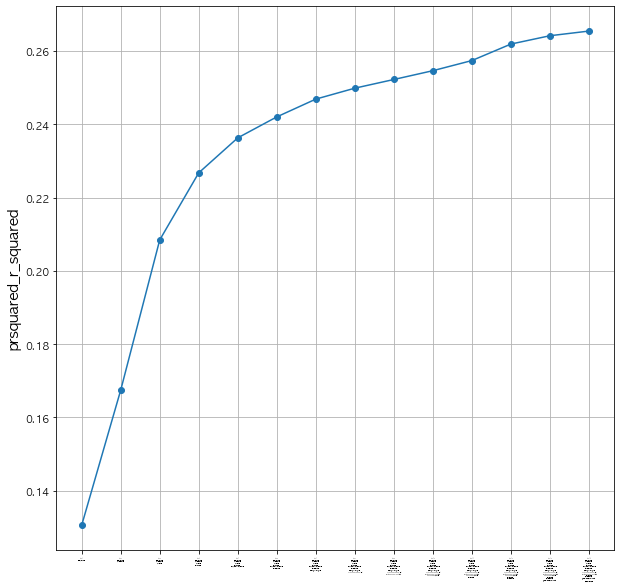

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=1)
plt.plot(steps,prsquared_r_squared, marker='o')
    
plt.ylabel('prsquared_r_squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [ ]:
len(forward_valriables)

13

In [ ]:
forward_valriables

['총자본사업이익률',
 '자기자본구성비율',
 '자기자본배율',
 '당좌자산회전률',
 '단기차입금 대 총차입금비율',
 '경영자본순이익률',
 '금융비용 대 총비용비율',
 'CPS(Cash flow Per Share)(원)',
 'BPS(Book-value Per Share)(원)',
 '경영자본회전률',
 '타인자본구성비율',
 '종업원1인당 순이익(백만원)',
 '순운전자본회전률']

- add_costant
https://datascienceschool.net/03%20machine%20learning/04.02%20선형회귀분석의%20기초.html

In [ ]:
# def forward_regression(X= X_train, y = y_train,
#                        initial_list=[], 
#                        threshold_in=0.05, 
#                        verbose=True,
#                        col_list = X_train.columns):
#     """[summary]

#     Args:
#         X ([DataFrame], optional): [feature 데이터 프레임]. Defaults to X_train.
#         y ([DataFrame], optional): [target 데이터 프레임]. Defaults to y_train.
#         initial_list (list, optional): [전진선택법에서 맨처음에 들어갈 기본 변수 리스트]. Defaults to [].
#         threshold_in (float, optional): [전진선택에서 변수를 추가할 때 p-value cutoff 설정]. Defaults to 0.05.
#         verbose ([boolin], optional): [전진선택법 시행 중 선택된 feature를 print하는 부분]. Defaults to True 
#         col_list ([list], optional): [전체 feature 리스트 설정].   
        
#     Returns:
#         [type]: [description]
#     """
#     initial_list = []
#     included = list(initial_list)
#     while True:
#         changed=False
#         # forward step
#         excluded = list(set(X[col_list])-set(included))
#         new_pval = pd.Series(index=excluded)
#         for new_column in excluded:
#             model = sm.Logit(y, sm.add_constant(X[included+[new_column]]))
#             result = model.fit()
#             new_pval[new_column] = result.pvalues[new_column]
#         best_pval = new_pval.min()
#         if best_pval < threshold_in:
#             best_feature = new_pval.argmin()
#             included.append(best_feature)
#             changed=True
#             if verbose:
#                 print('Add   with p-value '.format(best_feature, best_pval))

#         if not changed:
#             break

#     return included

In [ ]:
len(univar_feature)

64

In [ ]:
## 후진 소거법
variables =univar_feature #X_train.columns.tolist() ## 설명 변수 리스트
 
y = y_train ## 반응 변수
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(X_train[selected_variables])
    p_vals = sm.Logit(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.Logit(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [ ]:
univar_feature[1]

'종업원1인당 인건비증가율'

In [ ]:
# for i in univar_feature:
np.linalg.solve(y_train, X_train[univar_feature[1]])

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [ ]:

def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True,
                           feature_list = univar_feature
                           ):
    
    
    # sv_per_step = [] ## 각 스텝별로 선택된 변수들
    # prsquared_r_squared = [] ## 각 스텝별 수정된 결정계수
    # steps = [] ## 스텝
    # step = 0
    included = univar_feature
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[univar_feature]))).fit(disp=0, maxiter=100)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        # step += 1
        # steps.append(step)        
        # prsq_r_squared = sm.Logit(y, sm.add_constant(pd.DataFrame(X[univar_feature]))).fit(disp=0).prsquared
        # prsquared_r_squared.append(prsq_r_squared)
        # sv_per_step.append(forward_valriables.copy())
        
        if not changed:
            break
      
    return included#,step,steps,prsquared_r_squared,sv_per_step

backward_valriables = backward_regression(X_train, y_train)

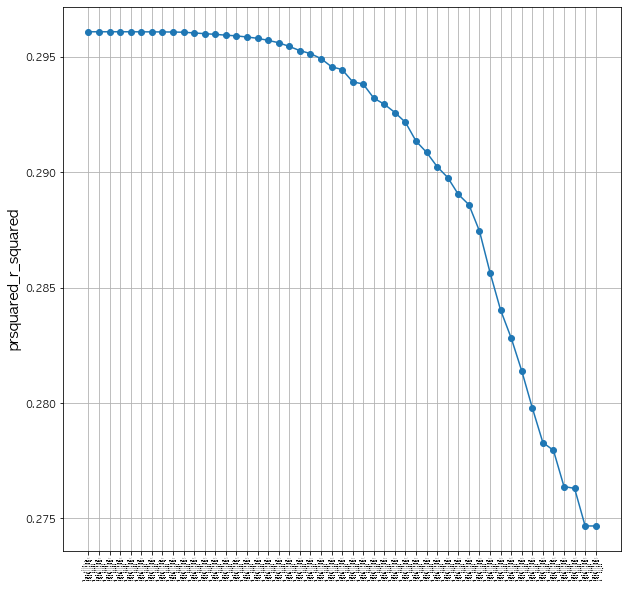

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=1)
plt.plot(steps,prsquared_r_squared, marker='o')
    
plt.ylabel('prsquared_r_squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [ ]:
len(backward_valriables)


36

In [ ]:
joint_var = list(set(forward_valriables) & set(backward_valriables))
len(joint_var)

10

In [ ]:
union_var = list(set(forward_valriables) | set(backward_valriables))
len(union_var)

21

In [ ]:
## 전진 단계별 선택법
def stepwise(df = X_train, y = y_train, sl_enter=.05, sl_remove=.05, variables = X_train.columns):
    """[summary]
    Args:
        df ([DataFrame], input_data): [X_train으로 설정한 df를 넣으면 됩니다.]. Defaults to X_train.
        y ([DataFrame], input_target): [target으로 설정한 y_train을 넣으면 됩니다]. Defaults to y_train.
        sl_enter (float, optional): [전진선택법에 적용할 p-value를 입력합니다.]. Defaults to .05.
        sl_remove (float, optional): [후진제거법에 적용할 p-value를 입력합니다.]. Defaults to .05.
        variables ([list], optional): [feature list입니다.]. Defaults to X_train.columns.
        
        처음에는 전진선택법과 같습니다. 전체 feature를 하나씩 넣고 p-value가 가장 작은 것을 뽑고 sl_enter과 비교하며
        selected_variables에 append시킬지 결정합니다. (p값이 설정한 sl_enter보다 유의하지 않으면 알고리즘 종료)
        그다음에는 selected_variables에서 model을 돌리고 feature 중 가장 p값이 높은것을 뽑고 sl_remov와 비교하여
        p값이 높으면 제거합니다.
    """
    selected_variables = [] ## 선택된 변수들
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = df[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.Logit(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = df[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.Logit(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            # adj_r_squared = sm.Logit(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
            # adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
        
    return selected_variables

In [ ]:
stepwise_feature = stepwise(df=X_train, y=y_train, variables=univar_feature)



In [ ]:
len(stepwise_feature)

10

In [ ]:
stepwise_feature

['총자본사업이익률',
 '자기자본구성비율',
 '금융비용 대 총비용비율',
 '경영자본순이익률',
 '유동자산회전률',
 '단기차입금 대 총차입금비율',
 '재고자산 대 유동자산비율',
 '타인자본구성비율',
 'CASH FLOW 대 총자본비율',
 '자기자본증가율']

In [ ]:
altman = ['순운전자본비율', '유보액대비율', 'CASH FLOW 대 총자본비율', '총자본회전률']

In [ ]:
df = pd.read_csv('dataset/v7_final.csv', encoding = 'euc-kr')
feature = df.columns[8:]
df = pd.DataFrame(feature)
df.rename(columns={0:'feature'}, inplace=True)
df['sector'] = 0
df['sector'][:14] = '성장성'
df['sector'][14:64] = '수익성'
df['sector'][64:103] = '안정성'
df['sector'][103:124] = '활동성'
df['sector'][124:140] = '생산성'
df['sector'][140:152] = '부가가치'
df['sector'][152:160] = '투자지표'
df['sector'][160:] = 'EBITDA지표'

/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_1709/2653359287.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sector'][:14] = '성장성'


In [ ]:
# 각 재무비율별 특성 정리 
def columns_classification(ex_list):
    """[summary]

    Args:
        ex_list ([list]): [feature_selection 진행 후 뽑은 feature list를 입력합니다]
    """
    result = pd.DataFrame(columns=['feature', 'sector'])
    for i in ex_list:
        tmp = df.loc[df['feature']==i]
        result = pd.concat([result, tmp])
    result.sort_values(by='sector')
    # 각 재무비율별 분포 확인 (radar-chart 이용)
    feat_ex_list = ['성장성', '수익성', '안정성', '활동성', '생산성', '부가가치', '투자지표','EBITDA지표']
    tmp_count = pd.DataFrame({
        'feature': feat_ex_list
        })
    result_count = result.groupby(result['sector']).count()
    chart = pd.DataFrame({
        'feature':result_count.index.values,
        'count':result_count['feature'].values
    })
    radar = tmp_count.merge(chart, on='feature', how='outer').fillna(0).transpose()
    radar.rename(columns=radar.iloc[0], inplace = True)
    radar.drop('feature', axis = 0, inplace=True)
    return radar, ex_list

In [ ]:
sf_count, sf_list = columns_classification(stepwise_feature)
sf_count

NameError: name 'stepwise_feature' is not defined

In [ ]:
sf_list

['총자본사업이익률',
 '자기자본구성비율',
 '금융비용 대 총비용비율',
 '경영자본순이익률',
 '유동자산회전률',
 '단기차입금 대 총차입금비율',
 '재고자산 대 유동자산비율',
 '타인자본구성비율',
 'CASH FLOW 대 총자본비율',
 '자기자본증가율']

In [ ]:
columns_classification(forward_valriables)

,성장성,수익성,안정성,활동성,생산성,부가가치,투자지표,EBITDA지표
count,1.0,5.0,5.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
forward_valriables

['총자본사업이익률',
 '자기자본구성비율',
 '자본금회전률',
 'CASH FLOW 대 부채비율',
 '단기차입금 대 총차입금비율',
 'CPS(Cash flow Per Share)(원)',
 'BPS(Book-value Per Share)(원)',
 '재고자산 대 유동자산비율',
 '이자부담률',
 '경영자본순이익률',
 '순운전자본비율',
 '자기자본증가율',
 '종업원1인당 순이익(백만원)']

Lasso를 적용한 feature_selection
- 투입 변수 : univar_feature (단변량 로짓으로 추출한 것)

In [ ]:
from sklearn.linear_model import Lasso
 
lasso_low = Lasso(alpha=0.03, max_iter=100000).fit(X_train[sig_val], y)
print("사용한 인자의 수 : {}".format(np.sum(lasso_low.coef_ != 0)))

사용한 인자의 수 : 36


In [ ]:
X_train[sig_val].iloc[:,lasso_low.coef_!=0].columns


Index(['자기자본증가율', '종업원1인당 인건비증가율', '총자본순이익률', '자기자본영업이익률', '자기자본순이익률',
       '경영자본순이익률', '영업외손익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '적립금비율(재정비율)',
       '1주당매출액(원)', 'EPS(Earning Per Share)(원)', 'CPS(Cash flow Per Share)(원)',
       'BPS(Book-value Per Share)(원)', '1주당영업이익(원)', '비유동비율', '비유동장기적합률',
       '부채비율', '비유동부채비율', '순운전자본비율', '차입금비율', '이자보상배율(이자비용)', '이자보상배율(순금융비용)',
       '유보액대비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '자본금회전률',
       '종업원1인당 매출액(백만원)', '종업원1인당 순이익(백만원)', '종업원1인당 인건비(백만원)',
       'EBITDA/매출액(%)', 'EBITDA/평균발행주식수(백만원)', '매출액순이익률', '재고자산 대 유동자산비율',
       '단기차입금 대 총차입금비율'],
      dtype='object')

In [ ]:
univar_feature

['총자본사업이익률',
 '총자본영업이익률',
 '경영자본영업이익률',
 '총자본순이익률',
 '기업순이익률',
 '경영자본순이익률',
 '유보액대비율',
 '수지비율',
 '자기자본구성비율',
 'CASH FLOW 대 총자본비율',
 '이자부담률',
 '총자본투자효율.1',
 '총자본투자효율',
 '자기자본순이익률',
 '차입금의존도',
 '자기자본영업이익률',
 '자기자본배율',
 '유보액 대 납입자본배율',
 '유보율',
 '순운전자본회전률',
 '타인자본구성비율',
 '타인자본회전률',
 '금융비용 대 총비용비율',
 '순운전자본비율',
 'CASH FLOW 대 부채비율',
 '종업원1인당 순이익(백만원)',
 '이자보상배율(순금융비용)',
 '단기차입금 대 총차입금비율',
 '종업원1인당 부가가치(백만원)',
 '종업원1인당 부가가치(백만원).1',
 '부채비율',
 '비유동비율',
 '유동자산회전률',
 '적립금비율(재정비율)',
 'BPS(Book-value Per Share)(원)',
 '당좌자산회전률',
 '사내유보 대 자기자본비율',
 '총자본회전률',
 '차입금비율',
 '비유동장기적합률',
 '유동부채비율',
 'CPS(Cash flow Per Share)(원)',
 '1주당매출액(원)',
 '경영자본회전률',
 '매출원가 대 매출액비율',
 '매출액총이익률',
 'EBITDA/평균발행주식수(백만원)',
 '비유동부채비율',
 'EPS(Earning Per Share)(원)',
 '재고자산 대 유동자산비율',
 '종업원1인당 매출액(백만원)',
 '1주당영업이익(원)',
 '외환이익 대 매출액비율',
 '종업원1인당 인건비증가율',
 '자기자본증가율',
 '종업원1인당 인건비(백만원)',
 '사내유보율',
 'PBR(Price book-value ratio)(최고)',
 '감가상각률']

In [ ]:
# from sklearn.linear_model import Ridge

# ridge = Ridge().fit(X_train, y_train) #alpha매개변수의 기본 값은 1.0
# print('alpha가 기본 값, 1.0일 때')
# print("training set score : %.2f" %(ridge.score(X_train, y_train)))
# print("test set score : %.2f" %(ridge.score(X_test, y_test)))
# ridge2 = Ridge(alpha=10).fit(X_train, y_train) #10
# print('\nalpha가 10일 때')
# print("training set score : %.2f" %(ridge2.score(X_train, y_train)))
# print("test set score : %.2f" %(ridge2.score(X_test, y_test)))
# ridge3 = Ridge(alpha=0.1).fit(X_train, y_train) #0.1
# print('\nalpha가 0.1일 때')
# print("training set score : %.2f" %(ridge3.score(X_train, y_train)))
# print("test set score : %.2f" %(ridge3.score(X_test, y_test)))

In [ ]:
# lasso = Lasso().fit(X_train, y_train)
# print("훈련 세트 점수 : %2f" %lasso.score(X_train, y_train))
# print("테스트 세트 점수 : %2f" %lasso.score(X_test, y_test))
# print("사용한 특성의 개수 : %d\n" %np.sum(lasso.coef_ !=0))

# #만약 max_iter가 반복횟수보다 작으면 경고 메시지가 출력됨
# lasso01 = Lasso(alpha = 0.1, max_iter=100000).fit(X_train, y_train)
# print("001훈련 세트 점수 : %2f" %lasso01.score(X_train, y_train))
# print("001테스트 세트 점수 : %2f" %lasso01.score(X_test, y_test))
# print("모델이 수행한 반복 횟수 : %d" %lasso01.n_iter_)
# print("사용한 특성의 개수 : %d\n" %np.sum(lasso01.coef_ !=0))

# lasso0001 = Lasso(alpha = 0.001, max_iter=100000).fit(X_train, y_train)
# print("0001훈련 세트 점수 : %2f" %lasso0001.score(X_train, y_train))
# print("0001테스트 세트 점수 : %2f" %lasso0001.score(X_test, y_test))
# print("모델이 수행한 반복 횟수 : %d" %lasso0001.n_iter_)
# print("사용한 특성의 개수 : %d\n" %np.sum(lasso0001.coef_ !=0))

# lasso0000001 = Lasso(alpha = 0.00001, max_iter=10000000).fit(X_train, y_train)
# print("00001훈련 세트 점수 : %2f" %lasso0000001.score(X_train, y_train))
# print("00001테스트 세트 점수 : %2f" %lasso0000001.score(X_test, y_test))
# print("모델이 수행한 반복 횟수 : %d" %lasso0000001.n_iter_)
# print("사용한 특성의 개수 : %d\n" %np.sum(lasso0000001.coef_ !=0))

In [ ]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_undersampled, y_undersampled = rus.fit_resample(X_train[stepwise_feature], y_train)

X_test = X_test[stepwise_feature]

In [ ]:
def show_result(y_test, prediction):
    
  # confusion_matrix 시각화
  sns.heatmap(confusion_matrix(y_test, prediction), annot=True,fmt="d", cmap='Reds')
  plt.xlabel('Predict')
  plt.ylabel('Actual')
  plt.show()

  #Confusion_matrix
  print(confusion_matrix(y_test, prediction))

  # 정확도
  print("accuracy", round( accuracy_score(y_test,prediction),3))

  #정밀도
  print("precision : ", round( precision_score(y_test, prediction),3) ) 

  #재현율
  print("recall : ", round( recall_score(y_test, prediction), 3) )

  #f1-score
  print("f1_score : ", round( f1_score(y_test, prediction), 3) )

In [ ]:
def Excute_lg (X_train, y_train, X_test, y_test):
    lr = LogisticRegression(random_state=0)
  
    lr.fit(X_train, y_train) 
    prediction = lr.predict(X_test)
    prediction_prob =lr.predict_proba(X_test)
  
    show_result(y_test, prediction)

In [ ]:
def Excute_sgd(X_train, y_train, X_test, y_test):
    sgd = SGDClassifier(random_state=0)

    sgd.fit(X_train, y_train)
    prediction = sgd.predict(X_test)
    
    show_result(y_test, prediction)

In [ ]:
def Excute_knn(X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier()

    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)

    show_result(y_test, prediction)

In [ ]:
def Excute_svm(X_train, y_train, X_test, y_test):
    result_df = pd.DataFrame()
    result_df['actual'] = y_test
    
    svc = SVC(random_state=0)
    svc.fit(X_train, y_train)
    prediction = svc.predict(X_test)

    show_result(y_test, prediction)

In [ ]:
def Excute_dt(X_train, y_train, X_test, y_test):
    dt = DecisionTreeClassifier(random_state=0)

    dt.fit(X_train, y_train)
    prediction = dt.predict(X_test)

    show_result(y_test, prediction)

In [ ]:
def Excute_pr(X_train, y_train, X_test, y_test):
    dt2 = DecisionTreeClassifier(max_depth=2)

    dt2.fit(X_train, y_train)
    prediction = dt2.predict(X_test)
    
    show_result(y_test, prediction)

In [ ]:
def Excute_rf(X_train, y_train, X_test, y_test):
    rfc = RandomForestClassifier(random_state=0)

    rfc.fit(X_train, y_train)
    prediction = rfc.predict(X_test)

    show_result(y_test, prediction)

In [ ]:
y_undersampled.value_counts()


0    176
1    176
Name: 차기부도여부, dtype: int64

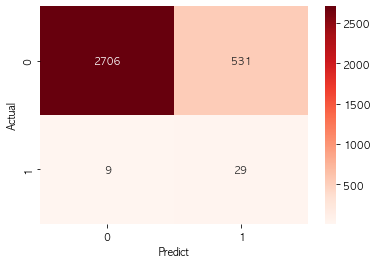

[[2706  531]
 [   9   29]]
accuracy 0.835
precision :  0.052
recall :  0.763
f1_score :  0.097


In [ ]:
Excute_lg(X_undersampled, y_undersampled, X_test, y_test)

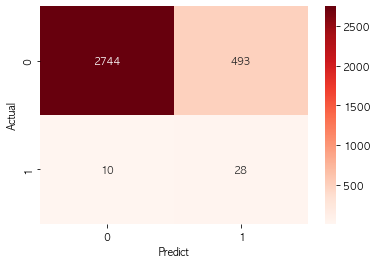

[[2744  493]
 [  10   28]]
accuracy 0.846
precision :  0.054
recall :  0.737
f1_score :  0.1


In [ ]:
Excute_sgd(X_undersampled, y_undersampled, X_test, y_test)

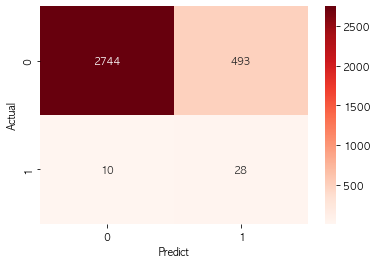

[[2744  493]
 [  10   28]]
accuracy 0.846
precision :  0.054
recall :  0.737
f1_score :  0.1


In [ ]:
Excute_knn(X_undersampled, y_undersampled, X_test, y_test)

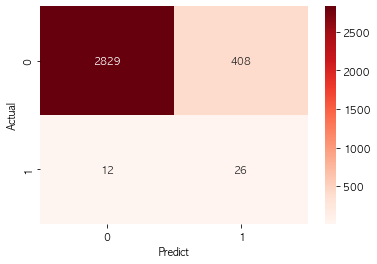

[[2829  408]
 [  12   26]]
accuracy 0.872
precision :  0.06
recall :  0.684
f1_score :  0.11


In [ ]:
Excute_svm(X_undersampled, y_undersampled, X_test, y_test)

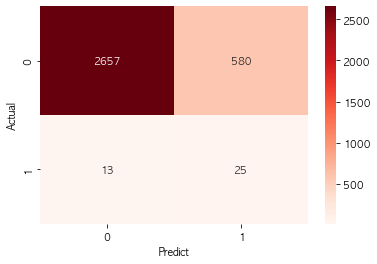

[[2657  580]
 [  13   25]]
accuracy 0.819
precision :  0.041
recall :  0.658
f1_score :  0.078


In [ ]:
Excute_dt(X_undersampled, y_undersampled, X_test, y_test)

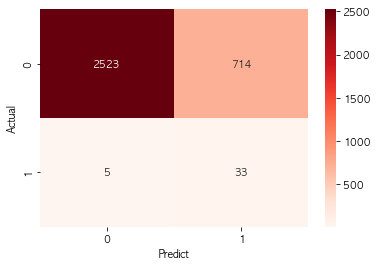

[[2523  714]
 [   5   33]]
accuracy 0.78
precision :  0.044
recall :  0.868
f1_score :  0.084


In [ ]:
Excute_pr(X_undersampled, y_undersampled, X_test, y_test)

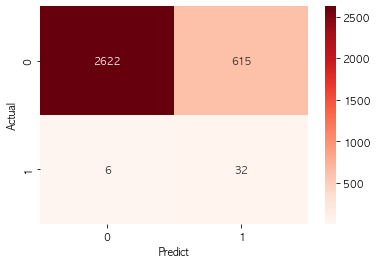

[[2622  615]
 [   6   32]]
accuracy 0.81
precision :  0.049
recall :  0.842
f1_score :  0.093


In [ ]:
Excute_sgd(X_undersampled, y_undersampled, X_test, y_test)


In [ ]:
forward_valriables

['총자본사업이익률',
 '자기자본구성비율',
 '자본금회전률',
 'CASH FLOW 대 부채비율',
 '단기차입금 대 총차입금비율',
 'CPS(Cash flow Per Share)(원)',
 'BPS(Book-value Per Share)(원)',
 '재고자산 대 유동자산비율',
 '이자부담률',
 '경영자본순이익률',
 '순운전자본비율',
 '자기자본증가율',
 '종업원1인당 순이익(백만원)']

In [ ]:
X_undersampled, y_undersampled = rus.fit_resample(X_train[forward_valriables], y_train)

X_test = X_test[forward_valriables]

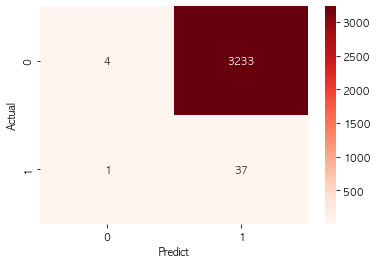

[[   4 3233]
 [   1   37]]
accuracy 0.013
precision :  0.011
recall :  0.974
f1_score :  0.022


In [ ]:
Excute_sgd(X_undersampled, y_undersampled, X_test, y_test)


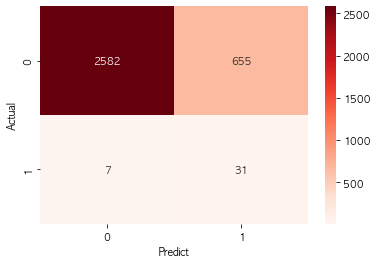

[[2582  655]
 [   7   31]]
accuracy 0.798
precision :  0.045
recall :  0.816
f1_score :  0.086


In [ ]:
Excute_knn(X_undersampled, y_undersampled, X_test, y_test)


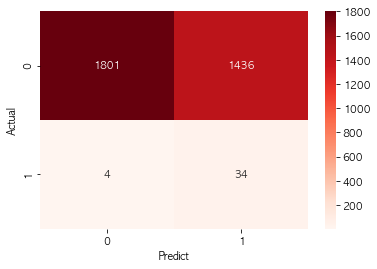

[[1801 1436]
 [   4   34]]
accuracy 0.56
precision :  0.023
recall :  0.895
f1_score :  0.045


In [ ]:
Excute_svm(X_undersampled, y_undersampled, X_test, y_test)


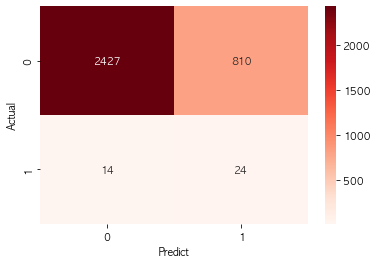

[[2427  810]
 [  14   24]]
accuracy 0.748
precision :  0.029
recall :  0.632
f1_score :  0.055


In [ ]:
Excute_dt(X_undersampled, y_undersampled, X_test, y_test)


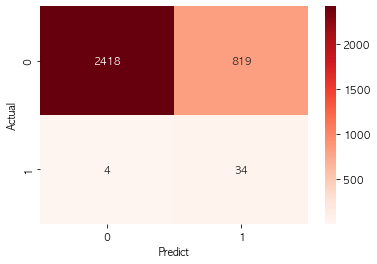

[[2418  819]
 [   4   34]]
accuracy 0.749
precision :  0.04
recall :  0.895
f1_score :  0.076


In [ ]:
Excute_pr(X_undersampled, y_undersampled, X_test, y_test)


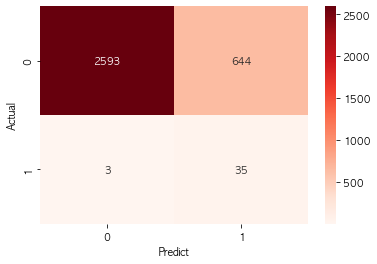

[[2593  644]
 [   3   35]]
accuracy 0.802
precision :  0.052
recall :  0.921
f1_score :  0.098


In [ ]:
Excute_rf(X_undersampled, y_undersampled, X_test, y_test)
